# Spring returns to the Great Plains

Mapping Tasiyagnunpa migration

## Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace.

In [1]:
%store -r

# Import libraries

## STEP 1: Set up your reproducible workflow

### Import Python libraries

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included some packages that you will need.
Add imports for packages that will help you:</p>
<ol type="1">
<li>Work with tabular data</li>
<li>Work with geospatial vector data</li>
</ol></div></div>

In [2]:

import earthpy
import geopandas as gpd
import pandas as pd


### Create a directory for your data

For this challenge, you will need to download some data to the computer
you’re working on. We suggest using the `earthpy` library we develop to
manage your downloads, since it encapsulates many best practices as far
as:

1.  Where to store your data
2.  Dealing with archived data like .zip files
3.  Avoiding version control problems
4.  Making sure your code works cross-platform
5.  Avoiding duplicate downloads

If you’re working on one of our assignments through GitHub Classroom, it
also lets us build in some handy defaults so that you can see your data
files while you work.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create a project folder</div></div><div class="callout-body-container callout-body"><p>The code below will help you get started with making a project
directory</p>
<ol type="1">
<li>Replace <code>'your-project-directory-name-here'</code> with a
<strong>descriptive</strong> name</li>
<li>Run the cell</li>
<li>The code should have printed out the path to your data files. Check
that your data directory exists and has data in it using the terminal or
your Finder/File Explorer.</li>
</ol></div></div>

> **File structure**
>
> These days, a lot of people find your file by searching for them or
> selecting from a `Bookmarks` or `Recents` list. Even if you don’t use
> it, your computer also keeps files in a **tree** structure of folders.
> Put another way, you can organize and find files by travelling along a
> unique **path**, e.g. `My Drive` \> `Documents` \>
> `My awesome project` \> `A project file` where each subsequent folder
> is **inside** the previous one. This is convenient because all the
> files for a project can be in the same place, and both people and
> computers can rapidly locate files they want, provided they remember
> the path.
>
> You may notice that when Python prints out a file path like this, the
> folder names are **separated** by a `/` or `\` (depending on your
> operating system). This character is called the **file separator**,
> and it tells you that the next piece of the path is **inside** the
> previous one.

In [3]:
# Create data directory
project = earthpy.Project(
    title="Tasiyagnunpa Migration 2023",
    dirname='migration')
# Download sample data
project.get_data()

# Display the project directory
project.project_dir


**Final Configuration Loaded:**
{}
Found 'data_home' in environment variables.
🔄 Fetching metadata for article 29119190...
✅ Found 2 files for download.


PosixPath('/workspaces/data/migration')

## STEP 2: Define your study area – the ecoregions of North America

Your sample data package included a Shapefile of global **ecoregions**.
You should be able to see changes in the number of observations of
Tasiyagnunpa in each ecoregion throughout the year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-info"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div></div><div class="callout-body-container callout-body"><p>You don’t have to use ecoregions to group species observations – you
could choose to use political boundaries like countries or states, other
natural boundaries like watersheds, or even uniform hexagonal areas as
is common in conservation work. We chose ecoregions because we expect
the suitability for a species at a particular time of year to be
relatively consistent across the region.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>The ecoregion data will be available as a <strong>shapefile</strong>.
Learn more about shapefiles and vector data in this <a
href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/">Introduction
to Spatial Vector Data File Formats in Open Source Python</a></p></div></div>

### Load the ecoregions into Python

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load ecoregions into Python</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Replace <code>a_path</code> with the path your created for your
ecoregions file.</li>
<li>(optional) Consider renaming and selecting columns to make your
<code>GeoDataFrame</code> easier to work with. Many of the same methods
you learned for <code>pandas</code> <code>DataFrame</code>s are the same
for <code>GeoDataFrame</code>s! NOTE: Make sure to keep the
<code>'SHAPE_AREA'</code> column around – we will need that later!</li>
<li>Make a quick plot with <code>.plot()</code> to make sure the
download worked.</li>
<li>Run the cell to load the data into Python</li>
</ol></div></div>

<Axes: >

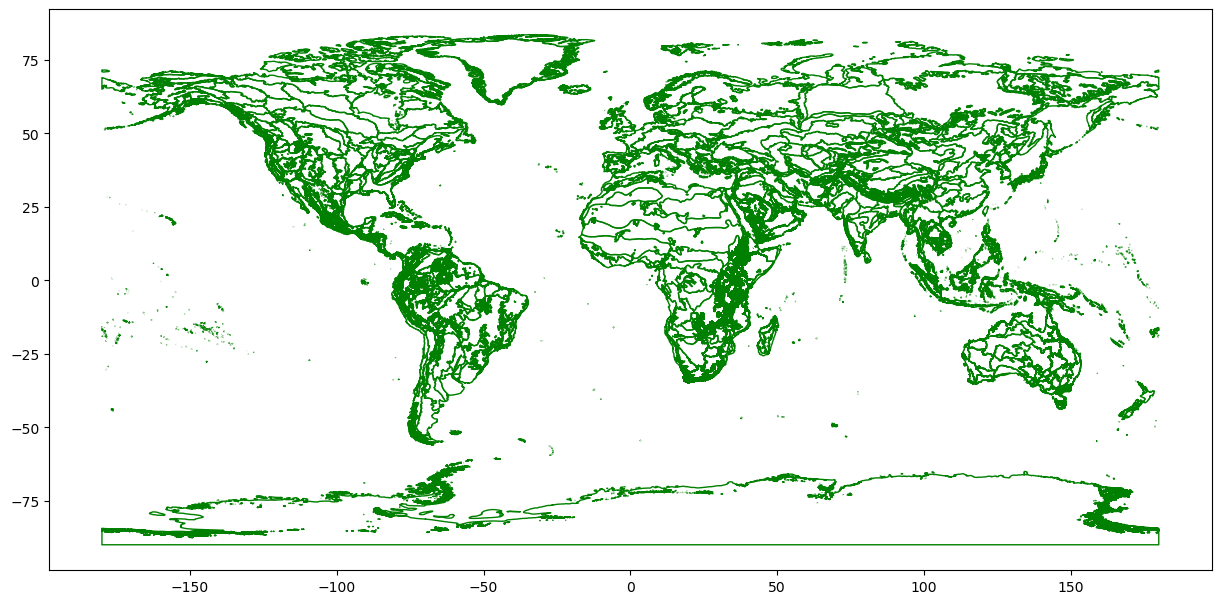

In [4]:
# Open up the ecoregions boundaries
ecoregions_gdf = gpd.read_file(project.project_dir / "wwf_ecoregions")

#Select Columns
ecoregions_gdf = ecoregions_gdf[['SHAPE_AREA' , 'geometry']]

# Name the index so it will match the other data later on
ecoregions_gdf.index.name = 'ecoregion'

# Plot the ecoregions quickly to check download
ecoregions_gdf.plot(edgecolor='green', facecolor='none' , figsize=(15, 10))

## STEP 3: Load species observation data

For this challenge, you will use a database called the [Global
Biodiversity Information Facility (GBIF)](https://www.gbif.org/). GBIF
is compiled from species observation data all over the world, and
includes everything from museum specimens to photos taken by citizen
scientists in their backyards. We’ve compiled some sample data in the
same format that you will get from GBIF.

Let’s start by looking at a little of the raw data.

In [5]:
gbif_path = project.project_dir / "gbif_tasiyagnunpa.csv"
gbif_path

PosixPath('/workspaces/data/migration/gbif_tasiyagnunpa.csv')

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load GBIF data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Look at the beginning of the file you downloaded using the code
below. What do you think the <strong>delimiter</strong> is?</li>
<li>Run the following code cell. What happens?</li>
<li>Uncomment and modify the parameters of <code>pd.read_csv()</code>
below until your data loads successfully and you have only the columns
you want.</li>
</ol></div></div>

You can use the following code to look at the beginning of your file:

In [10]:
!head -n 2 $gbif_path 

gbifID	datasetKey	occurrenceID	kingdom	phylum	class	order	family	genus	species	infraspecificEpithet	taxonRank	scientificName	verbatimScientificName	verbatimScientificNameAuthorship	countryCode	locality	stateProvince	occurrenceStatus	individualCount	publishingOrgKey	decimalLatitude	decimalLongitude	coordinateUncertaintyInMeters	coordinatePrecision	elevation	elevationAccuracy	depth	depthAccuracy	eventDate	day	month	year	taxonKey	speciesKey	basisOfRecord	institutionCode	collectionCode	catalogNumber	recordNumber	identifiedBy	dateIdentified	license	rightsHolder	recordedBy	typeStatus	establishmentMeans	lastInterpreted	mediaType	issue
4501319588	2f54cb88-4167-499a-81fb-0a2d02465212	http://arctos.database.museum/guid/DMNS:Bird:57539?seid=6172480	Animalia	Chordata	Aves	Passeriformes	Icteridae	Sturnella	Sturnella neglecta		SPECIES	Sturnella neglecta Audubon, 1844	Sturnella neglecta		US	Fort Collins, 6888 East County Road 56	Colorado	PRESENT		a2ef6dd1-8886-48c9-8025-c62bac973cc7	40.657779	-104.94

In [11]:
# Load the GBIF data
gbif_df = pd.read_csv(
    gbif_path, 
    delimiter="\t",
    index_col= "gbifID",
    usecols=[
        "gbifID" , 
        "decimalLatitude",
        "decimalLongitude",
        "month"]
)
gbif_df.head()

,decimalLatitude,decimalLongitude,month
gbifID,,,
4501319588,40.657779,-104.949130,5
4501319649,40.266835,-105.163977,7
4697139297,31.569170,-109.700950,2
4735897257,40.582947,-102.277350,4
4719794206,39.266953,-104.515920,6


### Convert the GBIF data to a GeoDataFrame

To plot the GBIF data, we need to convert it to a `GeoDataFrame` first.
This will make some special geospatial operations from `geopandas`
available, such as spatial joins and plotting.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert `DataFrame` to `GeoDataFrame`</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>your_dataframe</code> with the name of the
<code>DataFrame</code> you just got from GBIF</li>
<li>Replace <code>longitude_column_name</code> and
<code>latitude_column_name</code> with column names from your
`DataFrame</li>
<li>Run the code to get a <code>GeoDataFrame</code> of the GBIF
data.</li>
</ol></div></div>

In [13]:
gbif_gdf = (
    gpd.GeoDataFrame(
        gbif_df, 
        geometry=gpd.points_from_xy(
            gbif_df.decimalLongitude, 
            gbif_df.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [["month", "geometry"]]
)
gbif_gdf

,month,geometry
gbifID,,
4501319588,5,POINT (-104.94913 40.65778)
4501319649,7,POINT (-105.16398 40.26684)
4697139297,2,POINT (-109.70095 31.56917)
4735897257,4,POINT (-102.27735 40.58295)
4719794206,6,POINT (-104.51592 39.26695)
...,...,...
4796460466,4,POINT (-118.89593 35.43725)
4720342585,4,POINT (-109.28928 40.43625)
4725888708,6,POINT (-111.30072 47.66419)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure to store the new version of your <code>DataFrame</code> for
other notebooks!</p>
<div id="ba5952a4" class="cell" data-execution_count="14">
<div class="sourceCode" id="cb1"><pre
class="sourceCode python cell-code"><code class="sourceCode python"><span id="cb1-1"><a href="#cb1-1" aria-hidden="true" tabindex="-1"></a><span class="op">%</span>store ecoregions_gdf gbif_gdf</span></code></pre></div>
</div></div></div>

## Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! This code will store all your variables. You might want to
specify specific variables, especially if you have large objects in
memory that you won’t need in the future.

In [14]:
%store

Stored variables and their in-db values:


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!